In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid

In [2]:
r_s = 0.01
r_e = 10

In [6]:
over_r = np.array([ 0.1,  1, 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [7]:
rs = 1/over_r

In [12]:
1/0.5

2.0

In [38]:
rs = np.array([20, 10. , 2, 1 ,  0.5, 0.2       ,  0.1     ,
        0.05       ,      0.025     ])

In [39]:
1/rs

array([ 0.05,  0.1 ,  0.5 ,  1.  ,  2.  ,  5.  , 10.  , 20.  , 40.  ])

In [75]:
R0s = np.arange(1.1, 4.005, 0.005)
# rs = np.arange(0.01, 40, 0.001)
rs = 1/np.arange (1/40,1/0.05,0.2)
# rs = np.flip(rs)

num_r = len(rs)
num_R0 = len(R0s)
num_seed = 2000
threshold = np.zeros((num_R0, num_r))

pt = 0.95

for i in range(num_R0):
    for j in range(num_r):
        r = rs[j]
        R0 = R0s[i]
        q = 0.1
        newq = 0
        cnt = 0
        while abs(q - newq) > 1e-4 and cnt < 1e3:
            cnt += 1
            q = newq
            newq = (1 + R0 / r * (1 - q)) ** -r
        for k in range(1, num_seed + 1):
            Ponset = 1 - q ** k
            if Ponset > pt:
                threshold[i, j] = k
                break

In [76]:
x = R0s
xnum = len(x) - 1
y = rs
y = y.reshape((-1, 1))  # transpose y to match MATLAB code
ynum = len(y) - 1
X = np.zeros((ynum + 1, xnum + 1))
Y = np.zeros((ynum + 1, xnum + 1))

for i in range(ynum + 1):
    X[i, :] = x
for i in range(xnum + 1):
    Y[:, i] = rs

In [77]:
threshold[threshold>100]=0

/var/folders/vx/g_l159t12yb63094n730n4pm0000gn/T/ipykernel_19720/1276571765.py:11: RuntimeWarning: divide by zero encountered in log10
  contour = plt.contourf(X, 1/Y, np.log10(threshold.T), levels=levels, cmap='viridis')


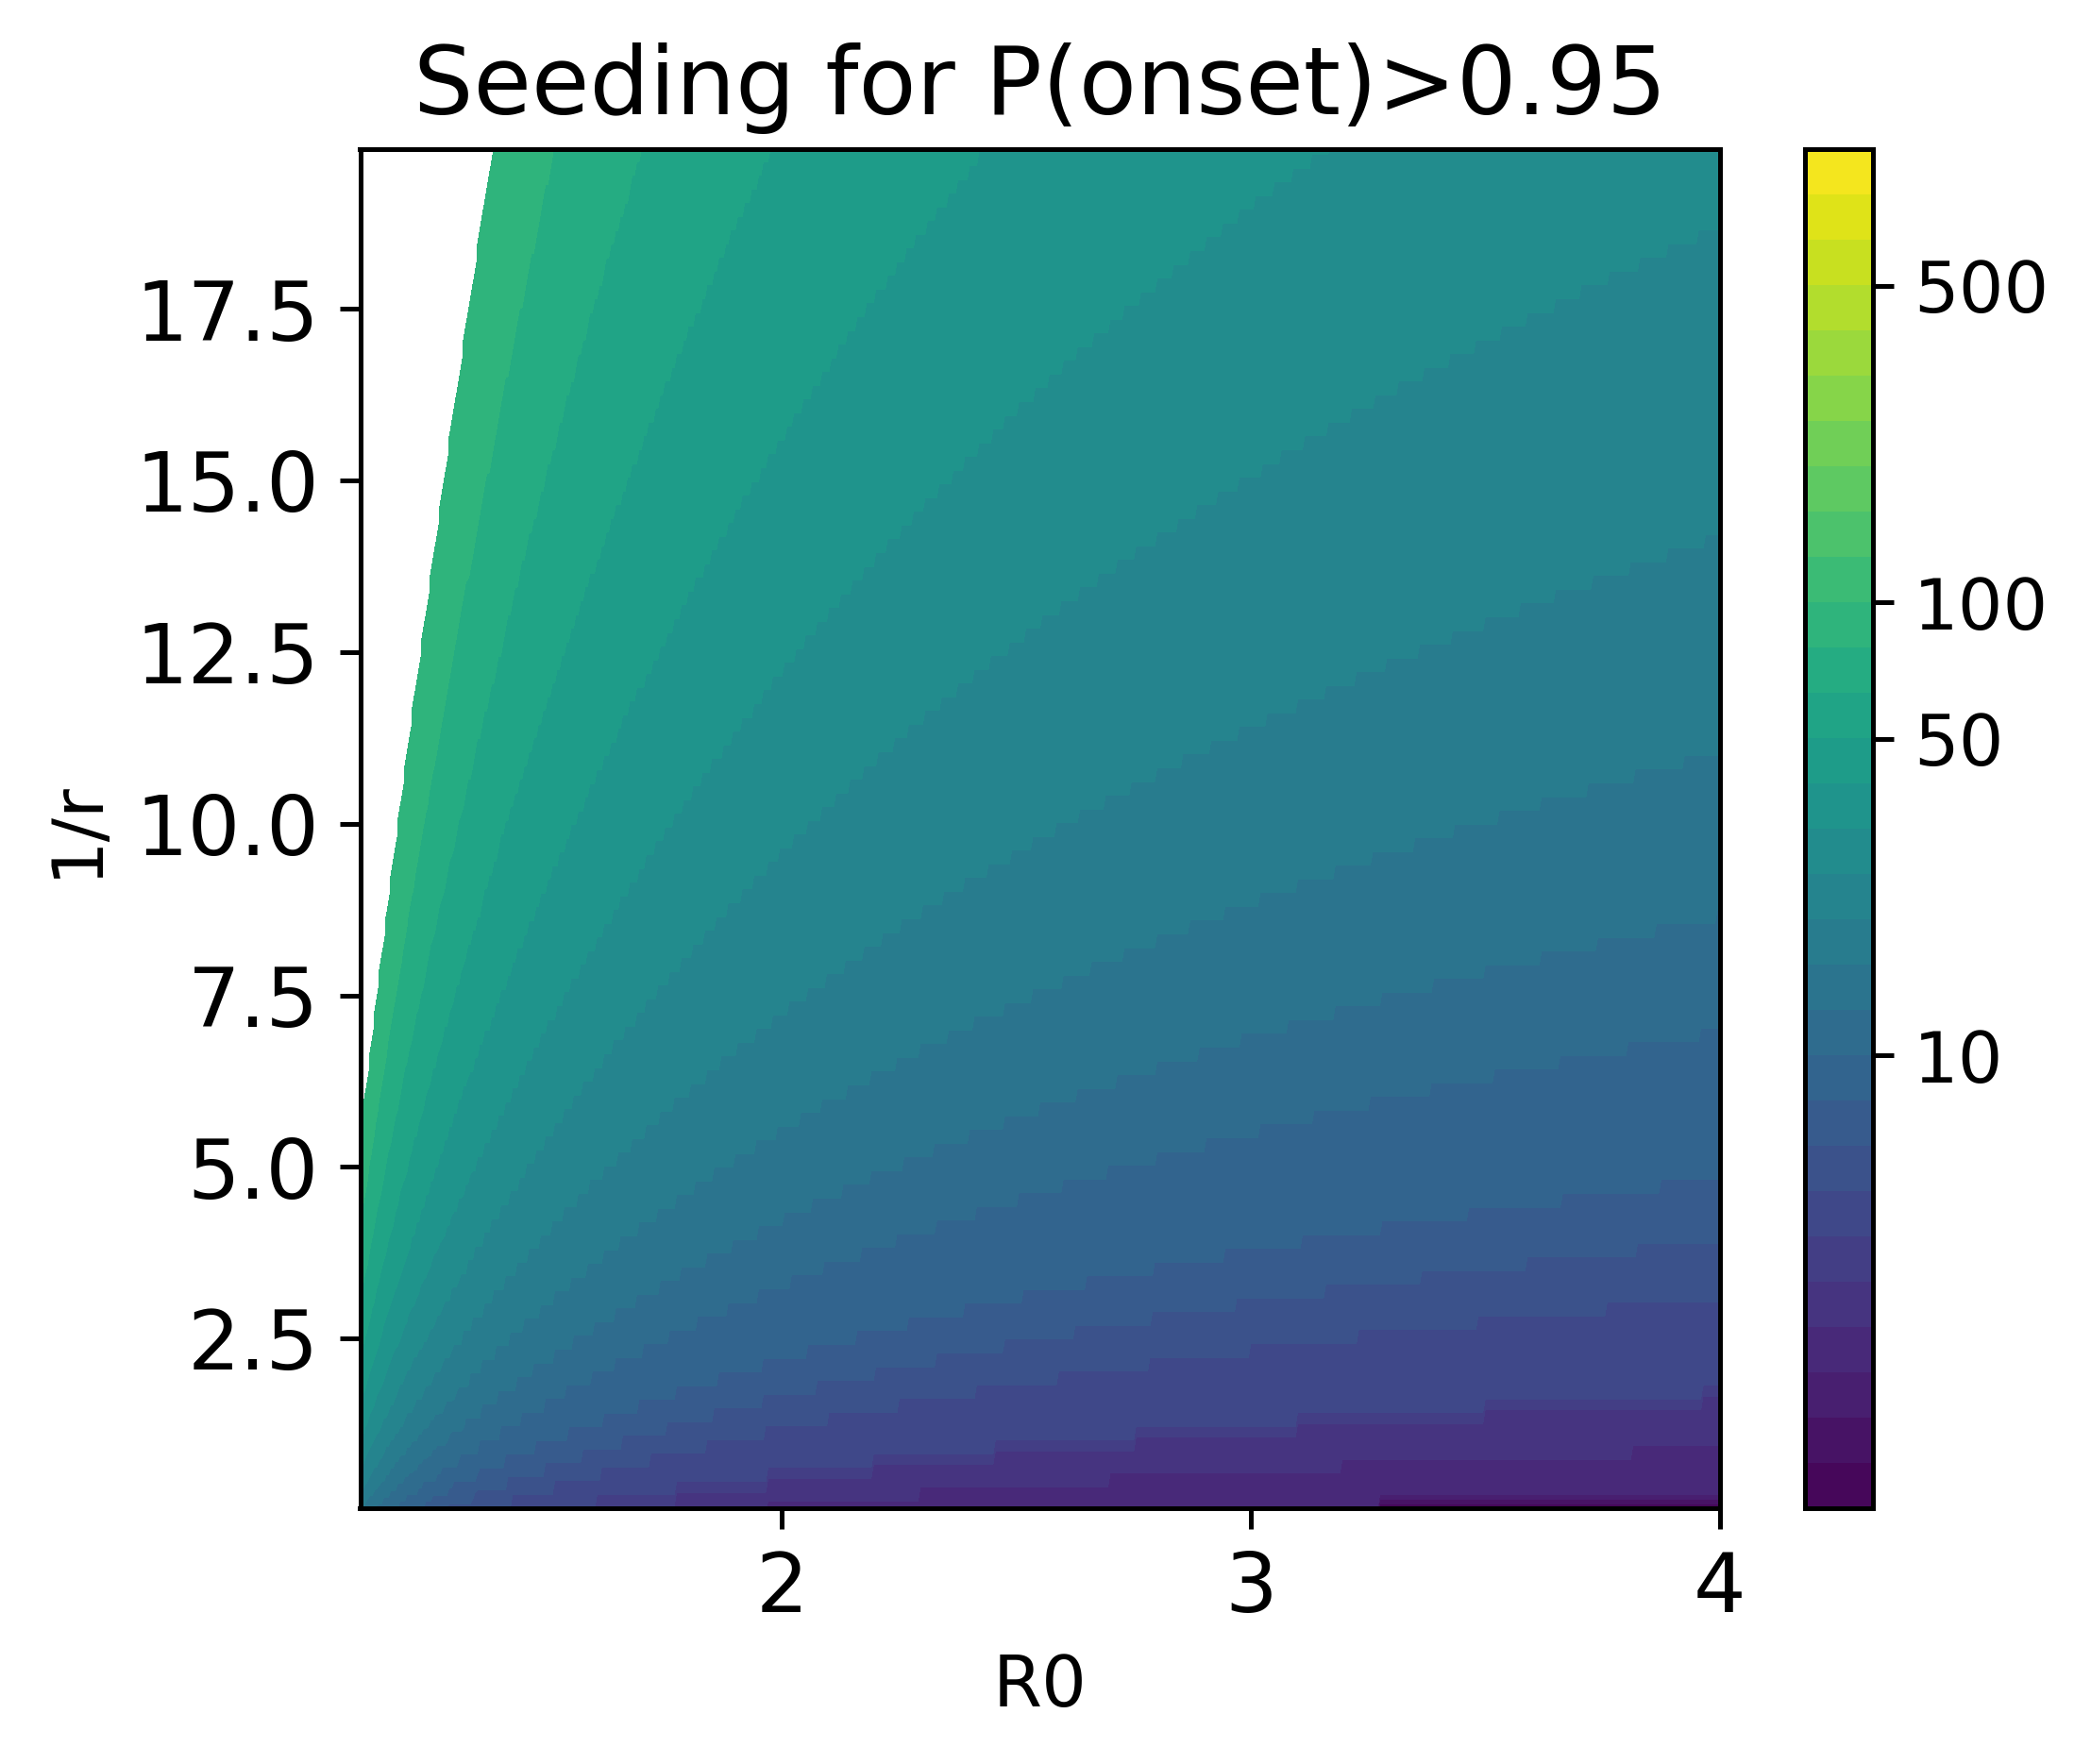

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Set figure size and position
fig = plt.figure(figsize=(5, 4), dpi=450)
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

# Create contour plot with log10(threshold)
levels = np.linspace(0, 3, 31)
contour = plt.contourf(X, 1/Y, np.log10(threshold.T), levels=levels, cmap='viridis')

# Get the Axes3D object and set the view
# ax = fig.gca(projection='3d')
# ax.view_init(elev=90, azim=-90)

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05, ticks=np.log10([10, 50, 100,500]))
cbh.ax.set_yticklabels([10, 50, 100, 500])
cbh.ax.tick_params(labelsize=12)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
plt.title('Seeding for P(onset)>0.95', fontsize=16)
plt.xlabel('R0', fontsize=12)
plt.ylabel('1/r', fontsize=12)

# Set axis limits and font size
plt.xlim([x[0], x[xnum]])
# plt.ylim([y[0], y[ynum]])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [84]:
s = 0
rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])
R0s = [2.5] # finish the rest of R0 values
param_grid = {'R0': R0s, 'r': rs}
grid = ParameterGrid(param_grid)
para_dict = list(grid)
para_i = para_dict[s]
R0 = para_i['R0']
r = para_i['r']